### Programming Assignment 5
# **Linear Regression**

AJ Dave A. Obis and Juan Francis C. Tuatis

## Import the libraries to be used


In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

# **General Guidelines**
## 1. Load and perform exploratory data analysis

In [160]:
data = pd.read_csv("cyber_attacks(in).csv")

# Transform the data to DataFrame
data_df = pd.DataFrame(data)

# Print the first few rows of the DataFrame
data_df.head()


,protocol_type,duration,src_bytes,dst_bytes,num_packets,num_connections,attack_type
0,1,43.418651,1701.411601,201.794741,42,15,Botnet
1,1,8.587924,409.971403,710.745376,17,6,Normal
2,1,4.386891,418.478693,559.457816,17,5,Normal
3,0,NaN,NaN,NaN,11,3,Normal
4,0,1.061892,494.253699,572.459614,11,3,Normal


### Check the Dataset Contents

In [161]:
# Number of rows and columns in the DataFrame
print("Number of rows: ", data_df.shape[0])
print("Number of columns: ", data_df.shape[1])

Number of rows:  10000
Number of columns:  7


In [162]:
# Check if there are missing values in the dataset
missing_values = data_df.isnull().sum()
print("Missing values:\n", + missing_values)

Missing values:
 protocol_type        0
duration           500
src_bytes          500
dst_bytes          500
num_packets          0
num_connections      0
attack_type          0
dtype: int64


Looking at the distribution of the dataset with missing values,

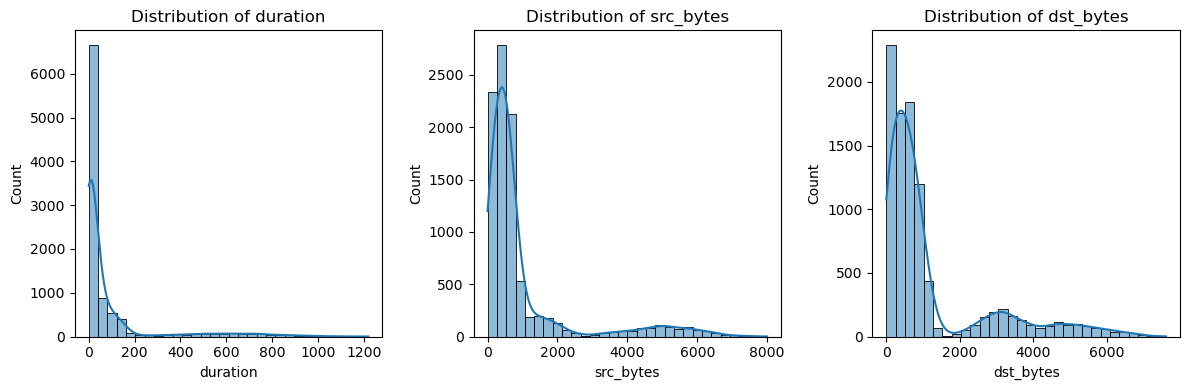

In [163]:
# Visualize distributions of affected numerical features
numerical_features = ['duration', 'src_bytes', 'dst_bytes']

# Plot histograms for missing value analysis
plt.figure(figsize=(12, 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

we can say that the data is right-skewed therefore highly variable.

### Attack Type Frequency

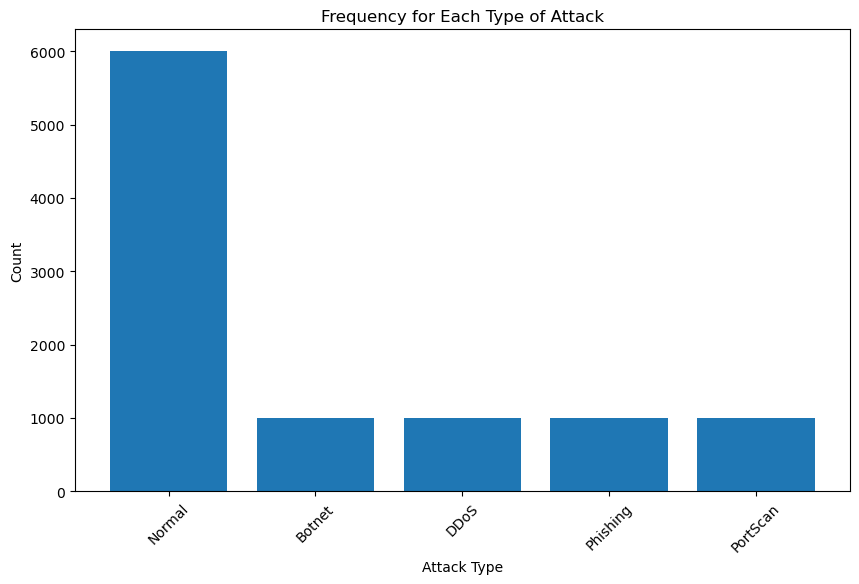

In [164]:
attack_counts = data_df['attack_type'].value_counts().reset_index()
attack_counts.columns = ['attack_type', 'count']

# Plot the attack counts
plt.figure(figsize=(10,6))
plt.bar(attack_counts['attack_type'], attack_counts['count'])

plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Frequency for Each Type of Attack')

plt.xticks(rotation=45)
plt.show()

### 

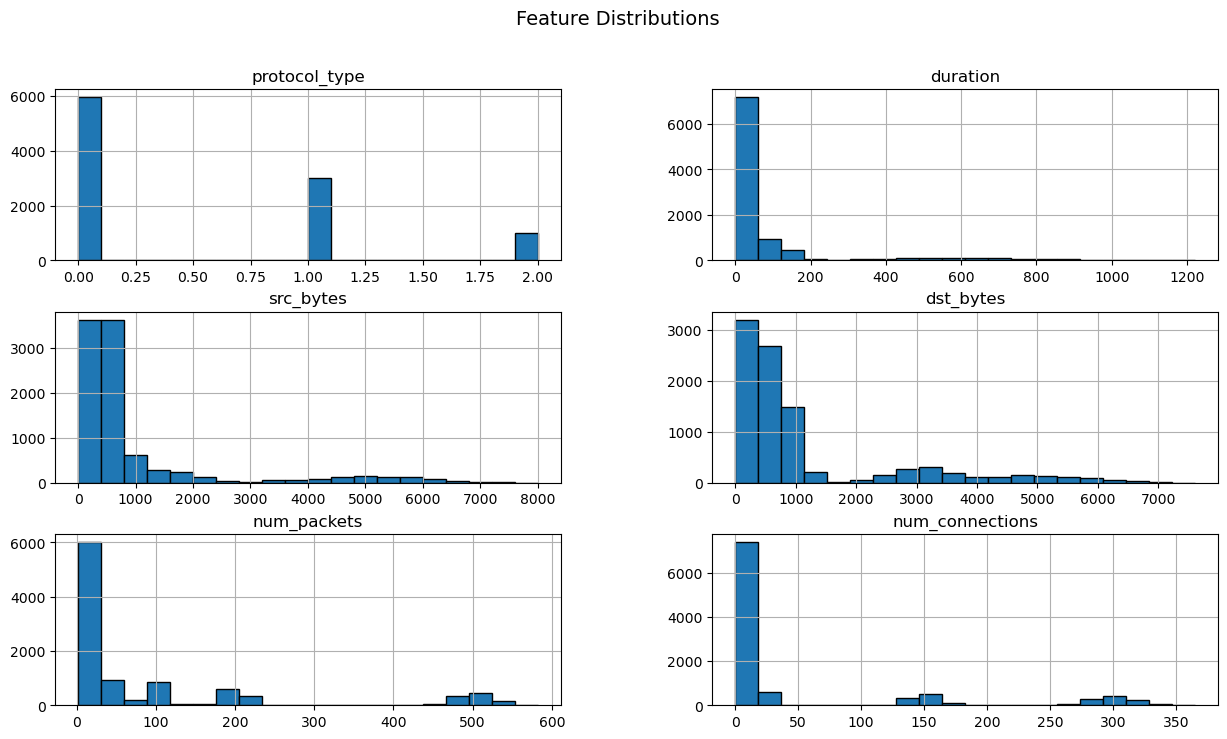

In [165]:
data_df.hist(figsize=(15, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

## 2. Perform data preprocessing.

### Handling missing values
To address the missing values from our EDA, we implemented median imputation which is effective for highly variable dataset and extreme values to avoid distortion

In [166]:
# Apply median imputation
imputer = SimpleImputer(strategy="median")
data_df[['duration', 'src_bytes', 'dst_bytes']] = imputer.fit_transform(data_df[['duration', 'src_bytes', 'dst_bytes']])

# show head
data_df.head()

,protocol_type,duration,src_bytes,dst_bytes,num_packets,num_connections,attack_type
0,1,43.418651,1701.411601,201.794741,42,15,Botnet
1,1,8.587924,409.971403,710.745376,17,6,Normal
2,1,4.386891,418.478693,559.457816,17,5,Normal
3,0,7.121187,500.910972,598.294521,11,3,Normal
4,0,1.061892,494.253699,572.459614,11,3,Normal


In [167]:
# Check if there are still missing values in the dataset
missing_values = data_df.isnull().sum()
print("Missing values:\n", + missing_values)

Missing values:
 protocol_type      0
duration           0
src_bytes          0
dst_bytes          0
num_packets        0
num_connections    0
attack_type        0
dtype: int64


### Encoding categorical variable/feature (eg. protocol_type)

In [168]:
# Display the unique values in the categorical column
print("Unique values in protocol_type:", data_df['protocol_type'].unique())

# Perform one-hot encoding on the protocol_type column
data_df = pd.get_dummies(data_df, columns=['protocol_type'], drop_first=True)

# Display the first few rows of the encoded dataset
print("\nDataset after one-hot encoding:")
print(data_df.head())

Unique values in protocol_type: [1 0 2]

Dataset after one-hot encoding:
    duration    src_bytes   dst_bytes  num_packets  num_connections  \
0  43.418651  1701.411601  201.794741           42               15   
1   8.587924   409.971403  710.745376           17                6   
2   4.386891   418.478693  559.457816           17                5   
3   7.121187   500.910972  598.294521           11                3   
4   1.061892   494.253699  572.459614           11                3   

  attack_type  protocol_type_1  protocol_type_2  
0      Botnet             True            False  
1      Normal             True            False  
2      Normal             True            False  
3      Normal            False            False  
4      Normal            False            False  


### Handle class imbalance

In [169]:
print(data_df['attack_type'].value_counts())

attack_type
Normal      6000
Botnet      1000
DDoS        1000
Phishing    1000
PortScan    1000
Name: count, dtype: int64


In [170]:
# Check if there are still missing values in the dataset
missing_values = data_df.isnull().sum()
print("Missing values:\n", + missing_values)

Missing values:
 duration           0
src_bytes          0
dst_bytes          0
num_packets        0
num_connections    0
attack_type        0
protocol_type_1    0
protocol_type_2    0
dtype: int64


In [171]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

#* Label Encoding on the attack_type column
enc = LabelEncoder()
data['attack_type'] = enc.fit_transform(data['attack_type'])
display(data.head())

#* For future purposes, return original labels
#! IMPORTANT: Run the `Load and Perform EDA` every time before running this code block. Failure to do so
#! will return the incorrect label encodings.

label_mapping = {index: class_label for index, class_label in enumerate(enc.classes_)}
print(label_mapping)

,protocol_type,duration,src_bytes,dst_bytes,num_packets,num_connections,attack_type
0,1,43.418651,1701.411601,201.794741,42,15,0
1,1,8.587924,409.971403,710.745376,17,6,2
2,1,4.386891,418.478693,559.457816,17,5,2
3,0,NaN,NaN,NaN,11,3,2
4,0,1.061892,494.253699,572.459614,11,3,2


{0: 'Botnet', 1: 'DDoS', 2: 'Normal', 3: 'Phishing', 4: 'PortScan'}


### Spliting the Train and Test Data
Split the data into training (70%) and testing (30%) sets.

In [172]:
from sklearn.utils import resample 
#* For resampling of minority class
X,y = data.drop('attack_type',axis=1) , data['attack_type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y, random_state=11)

train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['attack_type'] == 2]
minority_classes = train_data[train_data['attack_type'] != 2]

# Oversample the minority classes
minority_upsampled = resample(
    minority_classes,
    replace=True,  # Sample with replacement
    n_samples=len(majority_class)*4,  # Match the number of samples in the majority class
    random_state=11
)

# Combine the upsampled minority classes with the majority class
balanced_data = pd.concat([majority_class, minority_upsampled])

# Shuffle the dataset to ensure randomness
balanced_data = balanced_data.sample(frac=1, random_state=11).reset_index(drop=True)

# Separate features and labels again
X_train_resampled = balanced_data.drop(columns=['attack_type'])
y_train_resampled = balanced_data['attack_type']

#* Pipeline: Imputation using SimpleImputer on median, then pass to RandomForestClassifier with class_weight='balanced'
clf = make_pipeline(SimpleImputer(strategy='median'),RandomForestClassifier(n_estimators=3,class_weight='balanced',random_state=30,max_depth=3))
clf.fit(X_train_resampled,y_train_resampled)
y_pred = clf.predict(X_test)

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
display(df_report)

# Balanced Accuracy Score
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {balanced_acc:.4f}")


,precision,recall,f1-score,support
0,0.931677,1.000000,0.964630,300.000000
1,1.000000,1.000000,1.000000,300.000000
2,1.000000,0.999444,0.999722,1800.000000
3,1.000000,0.930000,0.963731,300.000000
4,1.000000,1.000000,1.000000,300.000000
accuracy,0.992667,0.992667,0.992667,0.992667
macro avg,0.986335,0.985889,0.985617,3000.000000
weighted avg,0.993168,0.992667,0.992669,3000.000000


Balanced Accuracy Score: 0.9859


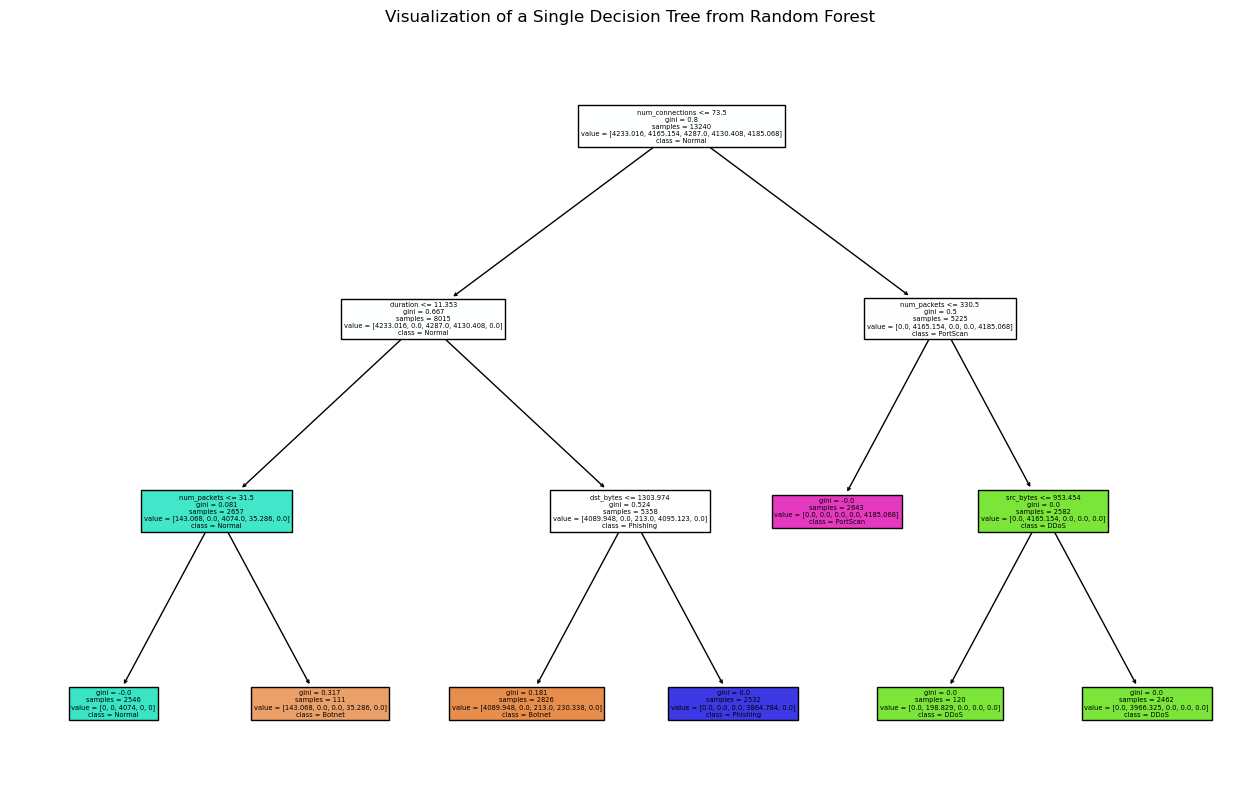

In [173]:
# Visualize one tree
# Step 1: Extract the RandomForestClassifier from the pipeline
rf_classifier = clf.named_steps['randomforestclassifier']
# Step 2: Access the first tree from the RandomForestClassifier
estimator = rf_classifier.estimators_[0]  # Choosing the first tree

# Step 3: Visualize the tree
plt.figure(figsize=(16, 10))
plot_tree(
    decision_tree=estimator,  # Pass the estimator directly
    feature_names=data.columns.drop('attack_type'),  # Feature names
    class_names=list(label_mapping.values()),  # Class names
    filled=True  # Fill nodes with colors
)
plt.title('Visualization of a Single Decision Tree from Random Forest')
plt.show()

## Guide Questions 

### 1. Preprocessing
### How did you handle missing values in numerical features?

Missing values were dealt with the use of SimpleImputer and median values. SimpleImputer(strategy = 'median') is used to handle the missing values effeciently. Furthermore, median was used since the data are skewed, and median is less sensitive to extreme values or outliers. 

### Why is there a need to encode protocol_type feature, and which encoding method can be used?

The protocol_type feature needs to be encoded because it is a categorical variable. One-hot encoding is used here because it creates a new binary feature for each unique value in the protocol_type feature. This allows the model to understand that the values are not ordinal, but categorical.

### 2. Model Training 
### How did you adddress class imbalance in the dataset?

Class imbalance was handled using random oversampling using the "resample()" function. Then it was divded into 2 class, the minority and majority class. The minority class were oversampled to have a number of instances comparable to the majority class. Furthermore, "class_weight="balanced"" was used as another parameter in the model to adjust for the imbalanced classes durin the model training.

### What hyperparameters of the Random Forest did you tune, and why?

For the hyperparameter tuning it was done on "n_estimators", "min_samples_split", "min_samples_leaf" and "bootstrap". The tuning of parameters was done to avoid the model from being overfitted and to find the better performance of the model without being overly fitted.

### Why is a pipeline useful for this task?

A pipeline is useful in this task because it allows for the seamless integration of multiple preprocessing steps and the final estimator into a single object. This makes it easy to train the model, make predictions, and evaluate it all in a single step.